In [4]:
import numpy as np
import pandas as pd

### 1. Loading Data

In [9]:
weather = pd.read_csv('../data/weather.csv', index_col="DATE")

In [10]:
weather

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT08
DATE,,,,,,,,,,,,,,,,,,,
2023-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.07,NaN,0.00,0.0,0.0,50,56.0,42.0,300.0,330.0,18.1,23.0,1.0,1.0,NaN,NaN,NaN
2023-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.49,NaN,0.02,0.0,0.0,46,55.0,39.0,190.0,190.0,12.1,14.1,1.0,NaN,NaN,NaN,NaN
2023-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",5.82,NaN,0.36,0.0,0.0,48,50.0,46.0,230.0,190.0,13.0,16.1,1.0,1.0,NaN,NaN,NaN
2023-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.49,NaN,0.01,0.0,0.0,51,61.0,45.0,200.0,250.0,13.0,15.0,1.0,1.0,NaN,NaN,NaN
2023-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.26,NaN,0.05,0.0,0.0,49,51.0,45.0,350.0,350.0,12.1,14.1,1.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",5.37,NaN,0.12,0.0,0.0,74,78.0,70.0,200.0,200.0,18.1,21.0,1.0,NaN,NaN,NaN,1.0
2023-07-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.38,NaN,0.00,0.0,0.0,76,84.0,70.0,180.0,160.0,13.0,17.0,1.0,NaN,NaN,NaN,1.0
2023-07-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.74,NaN,0.04,0.0,0.0,77,83.0,73.0,320.0,180.0,17.0,21.9,1.0,NaN,1.0,NaN,NaN


### 2. Cleaning missing values

In [11]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [12]:
null_pct

STATION    0.000000
NAME       0.000000
AWND       0.004902
PGTM       0.995098
PRCP       0.004902
SNOW       0.004902
SNWD       0.014706
TAVG       0.000000
TMAX       0.004902
TMIN       0.004902
WDF2       0.004902
WDF5       0.004902
WSF2       0.004902
WSF5       0.004902
WT01       0.588235
WT02       0.931373
WT03       0.901961
WT04       0.970588
WT08       0.901961
dtype: float64

In [13]:
# Keeping only columns with null_pct < 5%
valid_colums = weather.columns[null_pct < .05]

In [14]:
valid_colums

Index(['STATION', 'NAME', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX',
       'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5'],
      dtype='object')

In [15]:
weather = weather[valid_colums].copy()

In [17]:
# Transformation of column names into lower-case letters to simplify handling
weather.columns = weather.columns.str.lower()

In [18]:
weather

,station,name,awnd,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5
DATE,,,,,,,,,,,,,
2023-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.07,0.00,0.0,0.0,50,56.0,42.0,300.0,330.0,18.1,23.0
2023-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.49,0.02,0.0,0.0,46,55.0,39.0,190.0,190.0,12.1,14.1
2023-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",5.82,0.36,0.0,0.0,48,50.0,46.0,230.0,190.0,13.0,16.1
2023-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.49,0.01,0.0,0.0,51,61.0,45.0,200.0,250.0,13.0,15.0
2023-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.26,0.05,0.0,0.0,49,51.0,45.0,350.0,350.0,12.1,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",5.37,0.12,0.0,0.0,74,78.0,70.0,200.0,200.0,18.1,21.0
2023-07-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.38,0.00,0.0,0.0,76,84.0,70.0,180.0,160.0,13.0,17.0
2023-07-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.74,0.04,0.0,0.0,77,83.0,73.0,320.0,180.0,17.0,21.9


In [19]:
weather.apply(pd.isnull).sum()

station    0
name       0
awnd       1
prcp       1
snow       1
snwd       3
tavg       0
tmax       1
tmin       1
wdf2       1
wdf5       1
wsf2       1
wsf5       1
dtype: int64

In [21]:
weather = weather.ffill()

In [22]:
weather.apply(pd.isnull).sum()

station    0
name       0
awnd       0
prcp       0
snow       0
snwd       0
tavg       0
tmax       0
tmin       0
wdf2       0
wdf5       0
wsf2       0
wsf5       0
dtype: int64

### 3. Prepping data for ML

In [23]:
weather.dtypes

station     object
name        object
awnd       float64
prcp       float64
snow       float64
snwd       float64
tavg         int64
tmax       float64
tmin       float64
wdf2       float64
wdf5       float64
wsf2       float64
wsf5       float64
dtype: object

In [26]:
weather.index

Index(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
       '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10',
       ...
       '2023-07-14', '2023-07-15', '2023-07-16', '2023-07-17', '2023-07-18',
       '2023-07-19', '2023-07-20', '2023-07-21', '2023-07-22', '2023-07-23'],
      dtype='object', name='DATE', length=204)

In [27]:
# conversion of index type from "object" to "datetime" 
weather.index = pd.to_datetime(weather.index)

In [28]:
weather.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-07-14', '2023-07-15', '2023-07-16', '2023-07-17',
               '2023-07-18', '2023-07-19', '2023-07-20', '2023-07-21',
               '2023-07-22', '2023-07-23'],
              dtype='datetime64[ns]', name='DATE', length=204, freq=None)

<Axes: xlabel='DATE'>

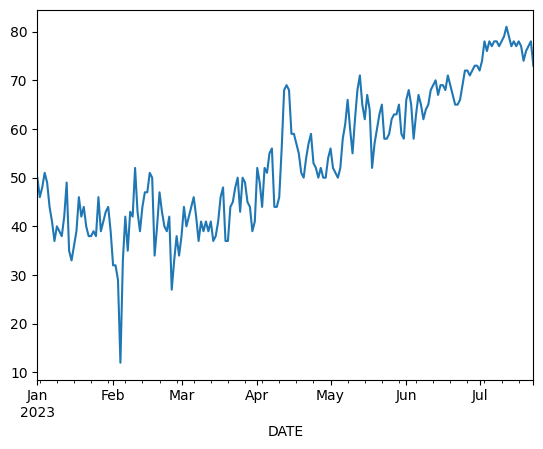

In [30]:
weather["tavg"].plot()

In [31]:
weather["target"] = weather.shift(-1)["tmax"]

In [32]:
weather

,station,name,awnd,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5,target
DATE,,,,,,,,,,,,,,
2023-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.07,0.00,0.0,0.0,50,56.0,42.0,300.0,330.0,18.1,23.0,55.0
2023-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.49,0.02,0.0,0.0,46,55.0,39.0,190.0,190.0,12.1,14.1,50.0
2023-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",5.82,0.36,0.0,0.0,48,50.0,46.0,230.0,190.0,13.0,16.1,61.0
2023-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.49,0.01,0.0,0.0,51,61.0,45.0,200.0,250.0,13.0,15.0,51.0
2023-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.26,0.05,0.0,0.0,49,51.0,45.0,350.0,350.0,12.1,14.1,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",5.37,0.12,0.0,0.0,74,78.0,70.0,200.0,200.0,18.1,21.0,84.0
2023-07-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.38,0.00,0.0,0.0,76,84.0,70.0,180.0,160.0,13.0,17.0,83.0
2023-07-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.74,0.04,0.0,0.0,77,83.0,73.0,320.0,180.0,17.0,21.9,86.0


In [33]:
# Filling the last value of "target"
weather = weather.ffill()

In [34]:
weather

,station,name,awnd,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5,target
DATE,,,,,,,,,,,,,,
2023-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.07,0.00,0.0,0.0,50,56.0,42.0,300.0,330.0,18.1,23.0,55.0
2023-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.49,0.02,0.0,0.0,46,55.0,39.0,190.0,190.0,12.1,14.1,50.0
2023-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",5.82,0.36,0.0,0.0,48,50.0,46.0,230.0,190.0,13.0,16.1,61.0
2023-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.49,0.01,0.0,0.0,51,61.0,45.0,200.0,250.0,13.0,15.0,51.0
2023-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.26,0.05,0.0,0.0,49,51.0,45.0,350.0,350.0,12.1,14.1,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",5.37,0.12,0.0,0.0,74,78.0,70.0,200.0,200.0,18.1,21.0,84.0
2023-07-20,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.38,0.00,0.0,0.0,76,84.0,70.0,180.0,160.0,13.0,17.0,83.0
2023-07-21,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.74,0.04,0.0,0.0,77,83.0,73.0,320.0,180.0,17.0,21.9,86.0


### 4. Train a ML model

In [37]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha = .1)

In [36]:
weather.corr()

,awnd,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5,target
awnd,1.000000,0.038703,0.070530,0.001870,-0.374277,-0.383047,-0.396930,0.362101,0.343029,0.849143,0.854842,-0.407889
prcp,0.038703,1.000000,0.059519,0.046000,-0.006867,-0.066476,0.054677,-0.162306,-0.191606,0.102628,0.138415,-0.032825
snow,0.070530,0.059519,1.000000,0.419661,-0.151757,-0.166795,-0.138270,-0.116824,-0.084944,0.081305,0.072599,-0.174179
snwd,0.001870,0.046000,0.419661,1.000000,-0.099872,-0.111230,-0.072253,-0.123437,-0.123195,0.021151,0.011512,-0.087939
tavg,-0.374277,-0.006867,-0.151757,-0.099872,1.000000,0.972571,0.977577,-0.185279,-0.149627,-0.393428,-0.361027,0.883895
tmax,-0.383047,-0.066476,-0.166795,-0.111230,0.972571,1.000000,0.932530,-0.152255,-0.098900,-0.375047,-0.346862,0.889206
tmin,-0.396930,0.054677,-0.138270,-0.072253,0.977577,0.932530,1.000000,-0.216442,-0.175949,-0.430436,-0.390252,0.872816
wdf2,0.362101,-0.162306,-0.116824,-0.123437,-0.185279,-0.152255,-0.216442,1.000000,0.772913,0.364766,0.367342,-0.267717
wdf5,0.343029,-0.191606,-0.084944,-0.123195,-0.149627,-0.098900,-0.175949,0.772913,1.000000,0.328397,0.319794,-0.213900
wsf2,0.849143,0.102628,0.081305,0.021151,-0.393428,-0.375047,-0.430436,0.364766,0.328397,1.000000,0.966608,-0.387791


In [38]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [39]:
predictors

Index(['awnd', 'prcp', 'snow', 'snwd', 'tavg', 'tmax', 'tmin', 'wdf2', 'wdf5',
       'wsf2', 'wsf5'],
      dtype='object')

In [ ]:
def backtest(weather, model, predictors, start = 60, step = 10):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])

        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis = 1)

        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    
    return pd.concat(all_predictions)